In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow import keras
from keras import Model
from keras.layers import Input, Conv2D, MaxPool2D, Dense, Flatten, AveragePooling2D

In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

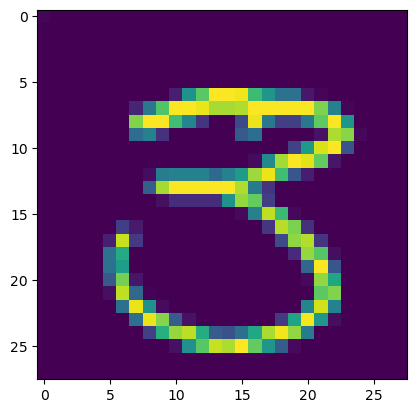

In [3]:
plt.imshow(np.array(train.iloc[7,:-1]).reshape(28,28))

In [4]:
y_train = train.pop('label')
train /= 255
test /= 255

In [5]:
X_temp, X_cross, y_temp, y_cross = train_test_split(train, y_train, test_size = 0.1)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size = 0.1)

In [6]:
X_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)
X_cross = tf.convert_to_tensor(X_cross)
y_cross = tf.convert_to_tensor(y_cross)
X_test = tf.convert_to_tensor(X_test)
y_test = tf.convert_to_tensor(y_test)

In [7]:
print(X_train.shape)
print(X_cross.shape)
print(X_test.shape)

(34020, 784)
(4200, 784)
(3780, 784)


# Logistic Regression

In [ ]:
reg_model = LogisticRegression()
reg_model.fit(X_train, y_train)

In [ ]:
print(reg_model.score(X_train, y_train))
print(reg_model.score(X_cross, y_cross))

In [ ]:
reg_model.score(X_test, y_test)

# KNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 15)
knn_model.fit(X_train, y_train)

In [ ]:
print(knn_model.score(X_train, y_train))
print(knn_model.score(X_cross, y_cross))

In [ ]:
knn_model.score(X_test, y_test)

# Prediction saving for ML algorithms


In [ ]:
predictions = {'Label' : knn_model.predict(test)}
predictions = pd.DataFrame(predictions)
print(predictions)

In [ ]:
predictions.to_csv('/kaggle/working/predictions.csv')

# Neural networks (LeNet - 5 architecture)


In [9]:
def nn_model():
  i = Input(shape = (28, 28, 1))
  a = Conv2D(6, 5, activation = 'relu')(i)
  b = AveragePooling2D(pool_size = (2, 2), strides = (2, 2))(a)
  c = Conv2D(16, 5, activation = 'relu')(b)
  m = AveragePooling2D(pool_size = (2, 2), strides = (2, 2))(c)
  m = Flatten()(m)
  d = Dense(120, activation = 'relu')(m)
  d2 = Dense(84, activation = 'relu')(d)
  output = Dense(10, activation = 'softmax')(d2)
  model = Model(inputs = i, outputs = output, name = 'mnist')
  return model

In [22]:
mnist_model = nn_model()
mnist_model.summary()

Model: "mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_4 (Averag  (None, 12, 12, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 256)               0     

In [23]:
mnist_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

In [12]:
def shaping_tensor(t, n_e):
  r = tf.reshape(t, shape = (n_e, 28, 28))
  r = tf.expand_dims(r, axis = -1)
  return r

In [13]:
X_train = shaping_tensor(X_train, 34020)
X_cross = shaping_tensor(X_cross, 4200)
X_test = shaping_tensor(X_test, 3780)

In [24]:
history = mnist_model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
426/426 [==============================] - 5s 5ms/step - loss: 0.4292 - accuracy: 0.8757 - val_loss: 0.1916 - val_accuracy: 0.9411
Epoch 2/10
426/426 [==============================] - 2s 5ms/step - loss: 0.1537 - accuracy: 0.9520 - val_loss: 0.1237 - val_accuracy: 0.9615
Epoch 3/10
426/426 [==============================] - 2s 5ms/step - loss: 0.1052 - accuracy: 0.9674 - val_loss: 0.0981 - val_accuracy: 0.9684
Epoch 4/10
426/426 [==============================] - 2s 4ms/step - loss: 0.0838 - accuracy: 0.9745 - val_loss: 0.0771 - val_accuracy: 0.9762
Epoch 5/10
426/426 [==============================] - 2s 4ms/step - loss: 0.0666 - accuracy: 0.9791 - val_loss: 0.0753 - val_accuracy: 0.9781
Epoch 6/10
426/426 [==============================] - 2s 4ms/step - loss: 0.0545 - accuracy: 0.9830 - val_loss: 0.0776 - val_accuracy: 0.9769
Epoch 7/10
426/426 [==============================] - 2s 4ms/step - loss: 0.0476 - accuracy: 0.9850 - val_loss: 0.0654 - val_accuracy: 0.9800
Epoch 

In [25]:
score = mnist_model.evaluate(X_cross, y_cross)
print("Test loss :", score[0])
print("Test accuracy :", score[1])

132/132 [==============================] - 0s 3ms/step - loss: 0.0602 - accuracy: 0.9810
Test loss : 0.060171496123075485
Test accuracy : 0.9809523820877075


In [26]:
test_score = mnist_model.evaluate(X_test, y_test)
print("Test loss :", test_score[0])
print("Test accuracy :", test_score[1])

119/119 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9820
Test loss : 0.059207599610090256
Test accuracy : 0.9820106029510498


In [27]:
test = tf.convert_to_tensor(test)
test = shaping_tensor(test, 28000)
p = mnist_model.predict(test)

875/875 [==============================] - 2s 2ms/step


In [28]:
p = np.argmax(p, axis = 1)

In [29]:
predictions = pd.DataFrame(p, columns = ['Label'], index = [i for i in range(1, 28001)])
predictions.to_csv('/kaggle/working/predictions.csv', index_label = 'ImageId')